Tady budu vkladat nejaky svuj bordel a potrebne package

In [19]:
library(readxl) #package na cteni excelu
library(dplyr) #muj nejmilovanejsi package

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Silový a funkční trénink - stání na jedné noze

Nejdříve načtu data a provedu nutné úpravy.

In [52]:
jedna_noha <- read_excel("na_jedne_noze.xlsx") #nactu data

#zbavim se sloupce s cislem jednotlivych pozorovani a taky poslednich 3 radku
jedna_noha <- jedna_noha[2:(nrow(jedna_noha)-3),2:ncol(jedna_noha)] 

colnames(jedna_noha) <- c("sil_ldk","sil_pdk","fun_ldk","fun_pdk") #prejmenuji sloupce
jedna_noha %>% glimpse()
jedna_noha <- data.frame(lapply(jedna_noha, function(x) as.numeric(as.character(x)))) #vsechny chracters prehodi na numeric

New names:
* `` -> ...1
* `` -> ...3
* `` -> ...5


Rows: 7
Columns: 4
$ sil_ldk <chr> "17", "78", "85", "76", "78", "85", "30"
$ sil_pdk <chr> "19", "47", "51", "80", "80", "51", "90"
$ fun_ldk <chr> "65", "76", "30", "90", "86", "205", "165"
$ fun_pdk <chr> "92", "64", "90", "86", "75", "194", "135"


## Dvouvýběrový Wilcoxonův test

Jednotlivci byli rozděleni do dvou skupin po sedmi. První skupina prošla Silovým tréninkem, druhá Funkčním tréninkem. Chci ověřit, který ze dvou tréninků je účinnější. U každého jednotlivce jsem změřil, jak dlouho vydrží stát na každé noze, a předpokládám, že tato výdrž perfektně reflektuje účinky tréninku. K porovnání účinnosti tréninků použiji Dvouvýběrový Wilcoxonův test. Vyhodnotím nejdříve účinky tréninků na levé nohy, potom na pravé nohy.

Pro první Dvouvýběrový Wilcoxonův test tedy zavádím nulovou hypotézu, že rozdělení výběrů obou tréninků jsou stejná pro levou nohu. Alternativní hypotéza je, že výběry pochází z různých rozdělení. Pro druhý test zavádím nulovou hypotézu, že rozdělení výběrů obou tréninků jsou stejná pro pravou nohu. Alternativní hypotéza je, že výběry pochází z různých rozdělení. Pro oba testy použiji standardní hladinu $\alpha = 0.05$. Oba testy jsou oboustranné.

In [61]:
#test pro levou dolni koncetinu
ldk_wt <- wilcox.test(jedna_noha$sil_ldk, jedna_noha$fun_ldk, alternative = c("two.sided"), paired = FALSE, correct = FALSE)
ldk_wt

#test pro pravou dolni koncetinu
pdk_wt <- wilcox.test(jedna_noha$sil_pdk, jedna_noha$fun_pdk, alternative = c("two.sided"), paired = FALSE, correct = FALSE)
pdk_wt

Warning message in wilcox.test.default(jedna_noha$sil_ldk, jedna_noha$fun_ldk, alternative = c("two.sided"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  jedna_noha$sil_ldk and jedna_noha$fun_ldk
W = 15, p-value = 0.2228
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(jedna_noha$sil_pdk, jedna_noha$fun_pdk, alternative = c("two.sided"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  jedna_noha$sil_pdk and jedna_noha$fun_pdk
W = 7.5, p-value = 0.0293
alternative hypothesis: true location shift is not equal to 0


Na hladině $\alpha = 0.05$ nezamítám v testu pro levé nohy nulovou hypotézu. Tedy nemám dostatek důkazů pro tvrzení, že jeden z tréninků je pro levou nohu účinnější než druhý.

Na hladině $\alpha = 0.05$ zamítám nulovou hypotézu v testu pro pravé nohy, což mě vede k závěru, že výběry pochází z různých rozdělení. Tedy mám dostatek důkazů pro tvrzení, že jeden z testů je účinnější než druhý. 



Ještě mohu použít jednostranné Dvouvýběrové Wilcoxonovy testy.
Tím se kdyžtak budu zabývat později, nemůžu tam přijít na jednu věc

In [66]:
one_side_ldk <- wilcox.test(jedna_noha$sil_ldk, jedna_noha$fun_ldk,
                            alternative = c("less"), paired = FALSE, correct = FALSE)
one_side_ldk


one_side_pdk <- wilcox.test(jedna_noha$sil_pdk, jedna_noha$fun_pdk, 
                            alternative = c("less"), paired = FALSE, correct = FALSE)
one_side_pdk

Warning message in wilcox.test.default(jedna_noha$sil_ldk, jedna_noha$fun_ldk, alternative = c("less"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  jedna_noha$sil_ldk and jedna_noha$fun_ldk
W = 15, p-value = 0.1114
alternative hypothesis: true location shift is less than 0


Warning message in wilcox.test.default(jedna_noha$sil_pdk, jedna_noha$fun_pdk, alternative = c("less"), :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  jedna_noha$sil_pdk and jedna_noha$fun_pdk
W = 7.5, p-value = 0.01465
alternative hypothesis: true location shift is less than 0


## Boxplot

Mohu jednotlivé výběry graficky znázornit pomocí boxplotů. Výběry levých nohou jsou znázorněny pomocí červených boxplotů, výběry pravých nohou pomocí modrých boxplotů.

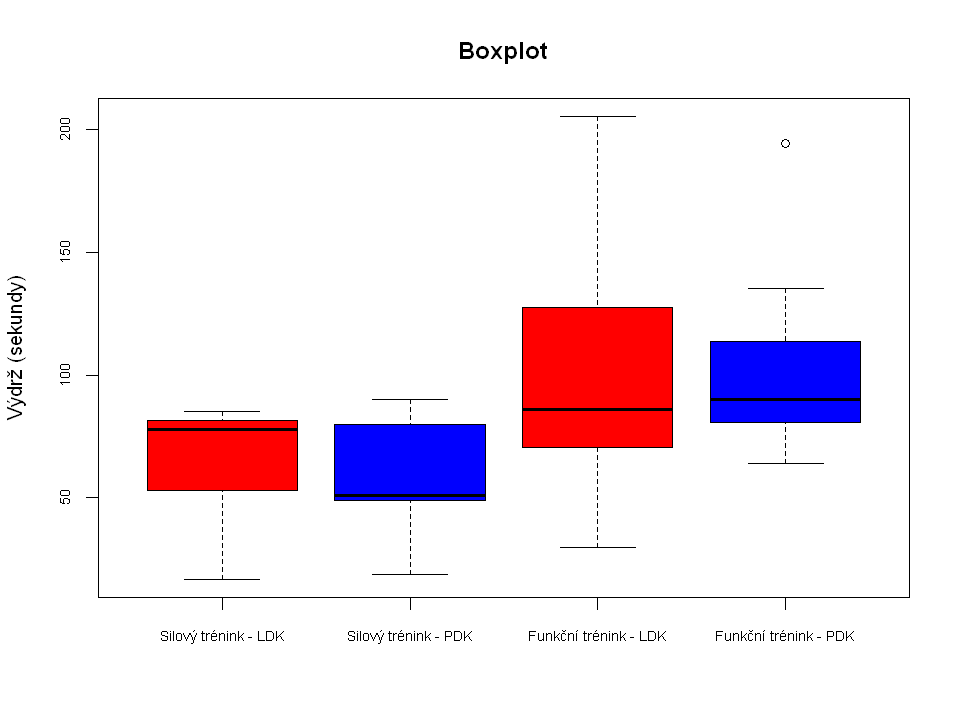

In [71]:
options(repr.plot.width=8, repr.plot.height=6)
barvicky <- c("red","blue")
popis <- c("Silový trénink - LDK","Silový trénink - PDK",
           "Funkční trénink - LDK","Funkční trénink - PDK")
boxplot(jedna_noha, xlab = "", ylab = "Výdrž (sekundy)", col = barvicky, names = popis, par(cex.axis=0.7))
title("Boxplot")

odsud dál ignoruj

In [62]:
?wilcox.test()

Při pohledu na data se zdá, že účinnost Silového tréninku byla vyšší než účinnost Funkčního tréninku pro obě nohy (tj. výdrže u Silového tréninku se zdají spíše nižší než výdrže u Funkčního tréninku). 